In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.datasets import load_iris

im gonna load the dataset now

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

im gonna map target names

In [3]:
df['species'] = df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

Exploratory Data Analysis

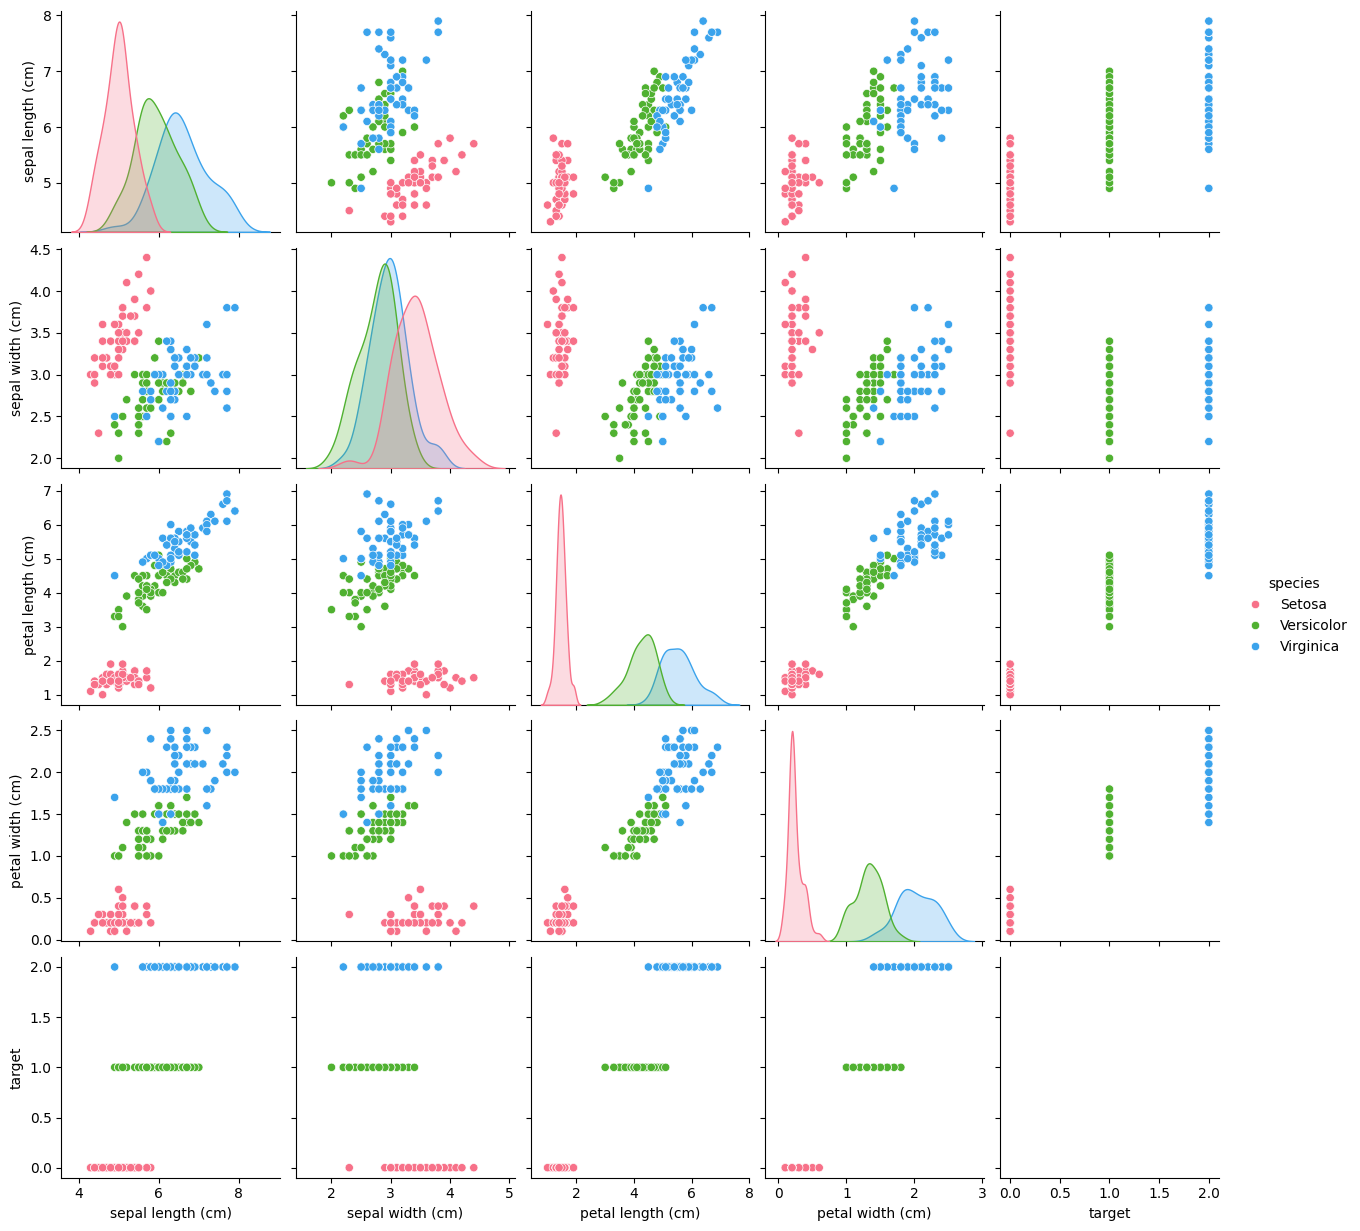

In [4]:
sns.pairplot(df, hue="species", diag_kind='kde', palette='husl')
plt.show()


I used seaborn pairplot to visualize the relationshoips between features

Splitting data for binary classification (Setosa vs Versicolor)

In [5]:
binary_df = df[df['target'] != 2]
X_binary = binary_df.iloc[:, :-2]
y_binary = binary_df['target']

In [6]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)


selected two classes and applied the logistic regression

Standartizing

In [7]:
scaler = StandardScaler()
X_train_bin_scaled = scaler.fit_transform(X_train_bin)
X_test_bin_scaled = scaler.transform(X_test_bin)


Binary logistic regression

In [8]:
binary_model = LogisticRegression()
binary_model.fit(X_train_bin_scaled, y_train_bin)
y_pred_bin = binary_model.predict(X_test_bin_scaled)

evaluation

In [9]:
print("Binary Classification Report:\n", classification_report(y_test_bin, y_pred_bin))
print("Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred_bin))


Binary Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[12  0]
 [ 0  8]]


roc curve

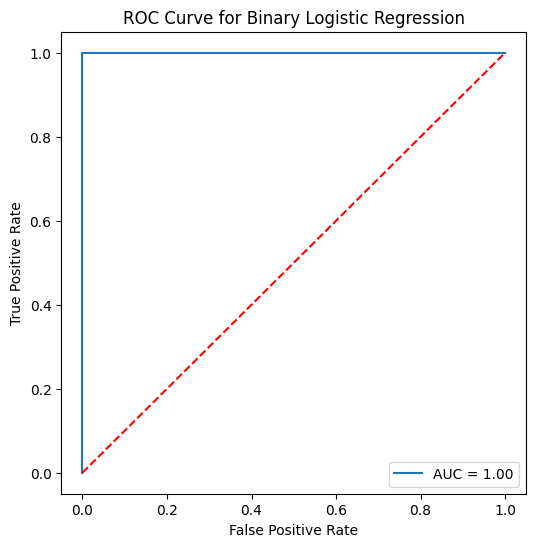

In [10]:
fpr, tpr, _ = roc_curve(y_test_bin, binary_model.predict_proba(X_test_bin_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Logistic Regression')
plt.legend()
plt.show()

Evaluated using accuracy, confusion matrix, and ROC curve

Multi-class Classification (Softmax Regression)

In [11]:
X = df.iloc[:, :-2]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_model.fit(X_train_scaled, y_train)
y_pred_multi = softmax_model.predict(X_test_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


This time i trained a Softmax Regression model using all three classes

evaluation softmax

In [12]:
print("Multi-class Classification Report:\n", classification_report(y_test, y_pred_multi))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_multi))


Multi-class Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


decision boundaries for multi-class model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


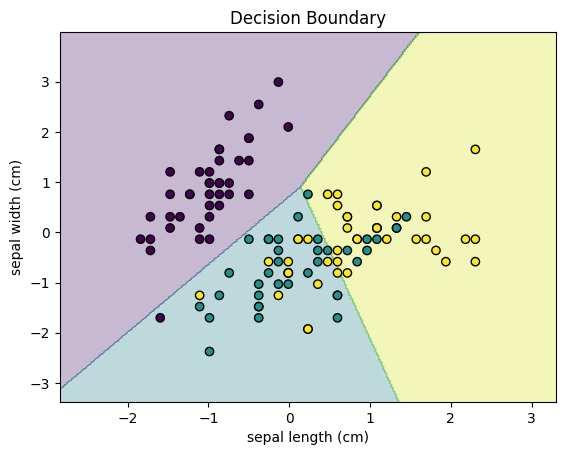

In [14]:
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("Decision Boundary")
    plt.show()

# Use only first two features for decision boundary visualization
plot_decision_boundary(X_train_scaled[:, :2], y_train, LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_train_scaled[:, :2], y_train))
